In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib as plt


In [2]:
data=pd.read_csv('loan_prediction.csv')
df=data.copy()

<H1>Data Understanding

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
data.duplicated().sum()
df.shape

(614, 13)

<AxesSubplot:>

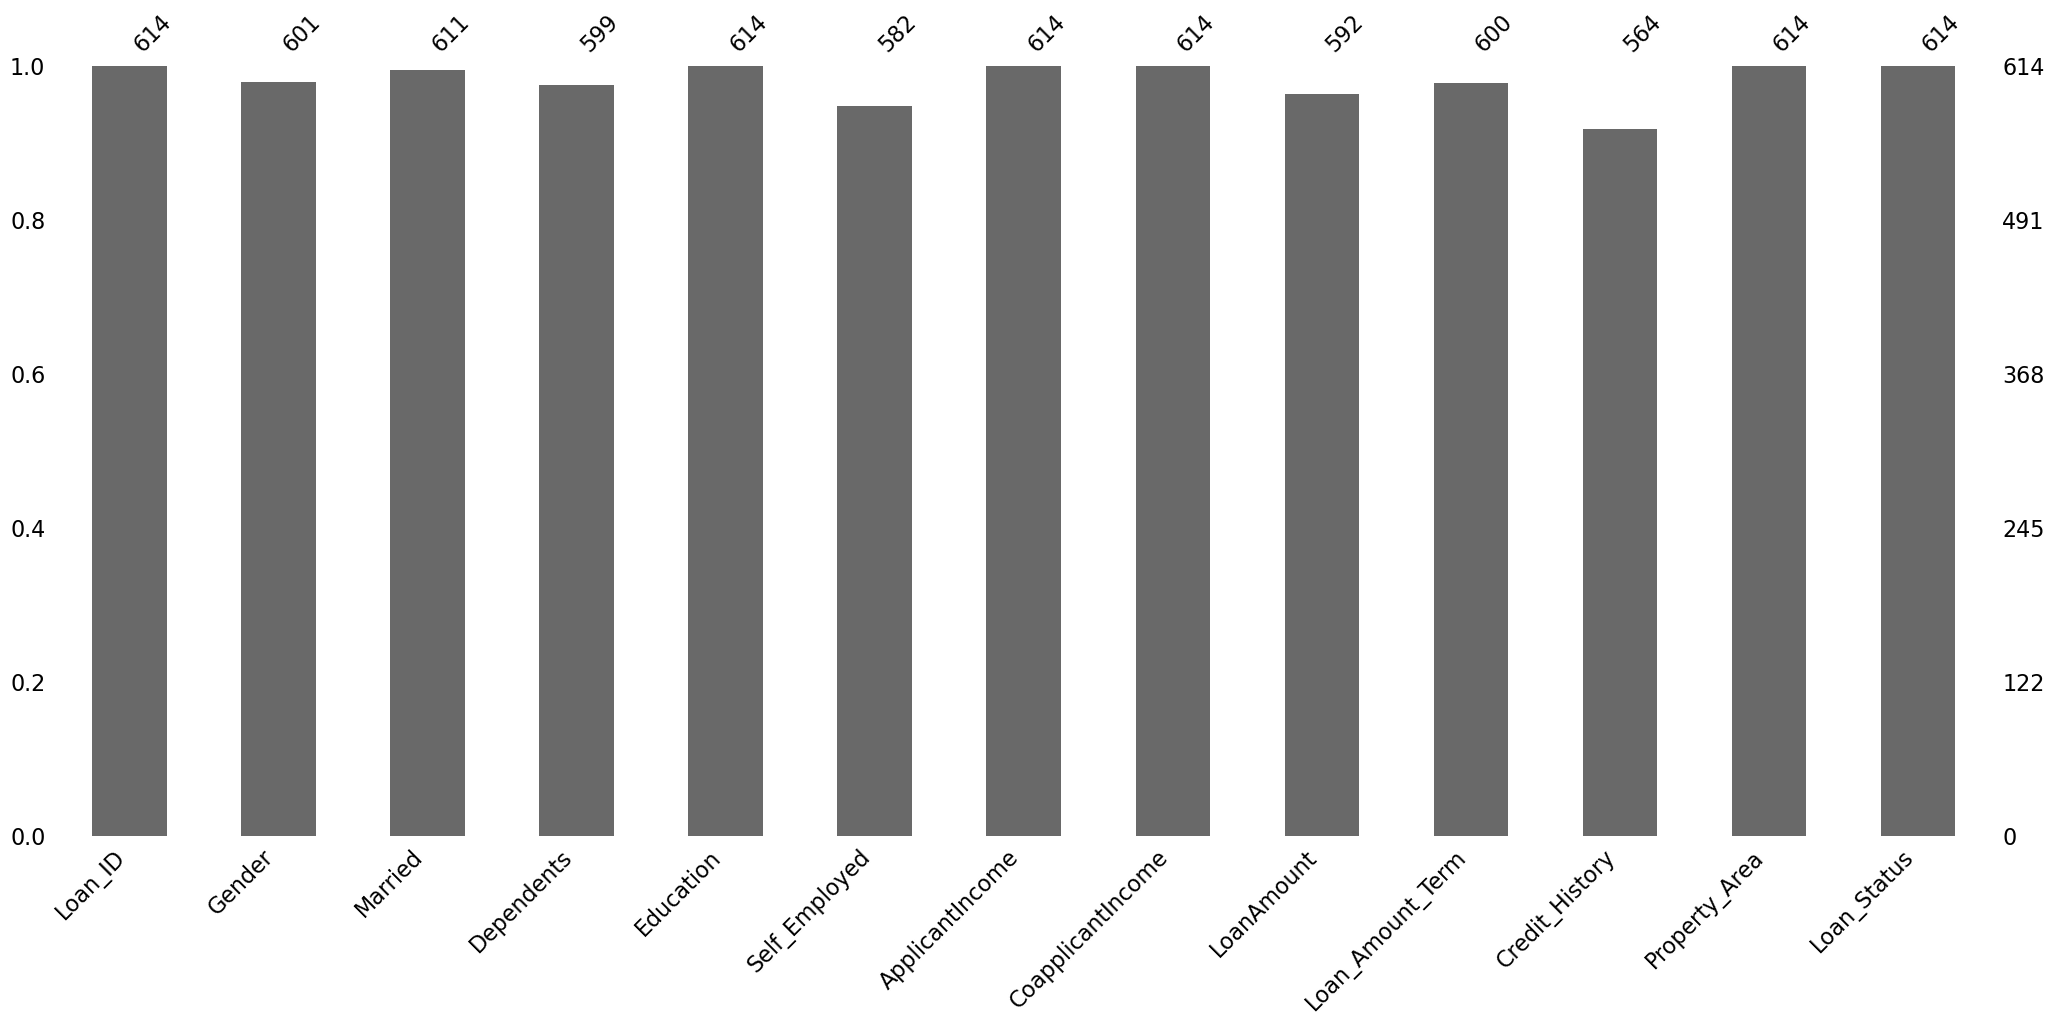

In [7]:
msno.bar(df)

In [8]:
df.shape

(614, 13)

<AxesSubplot:>

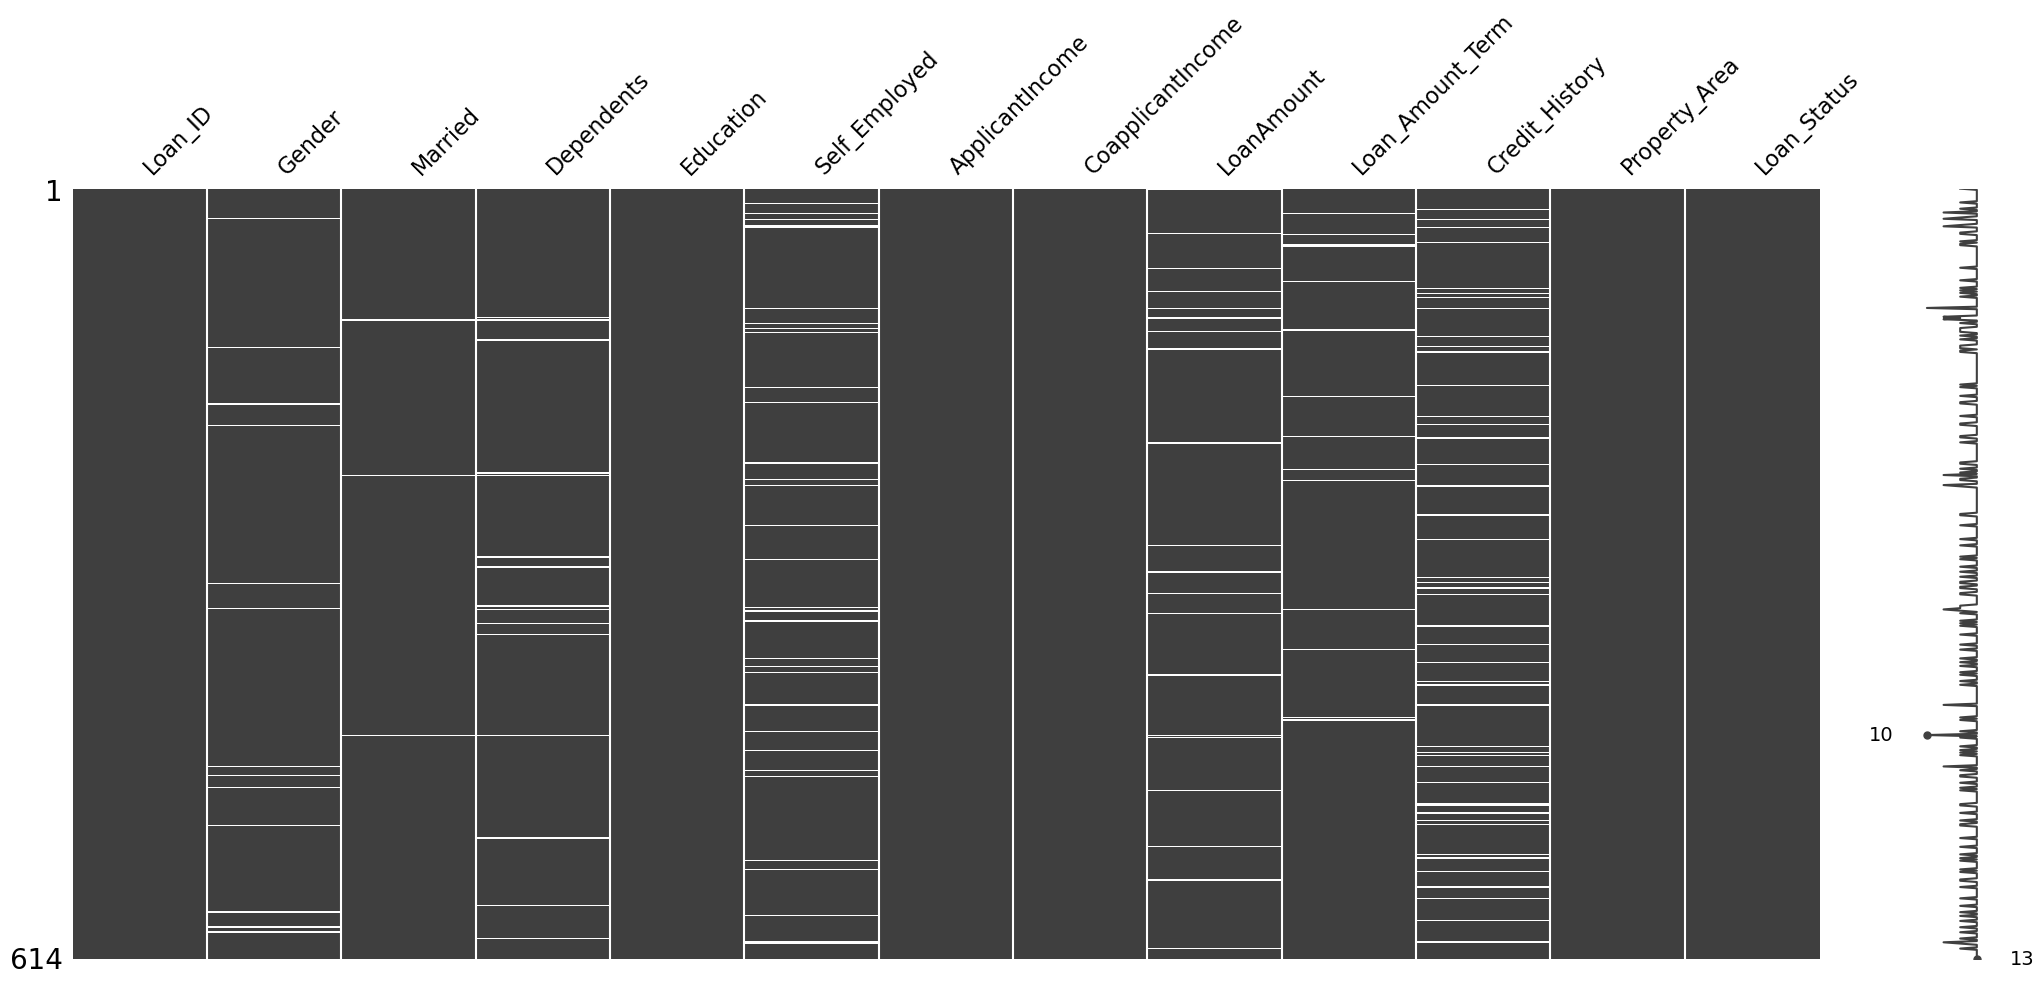

In [9]:
msno.matrix(df)

<AxesSubplot:>

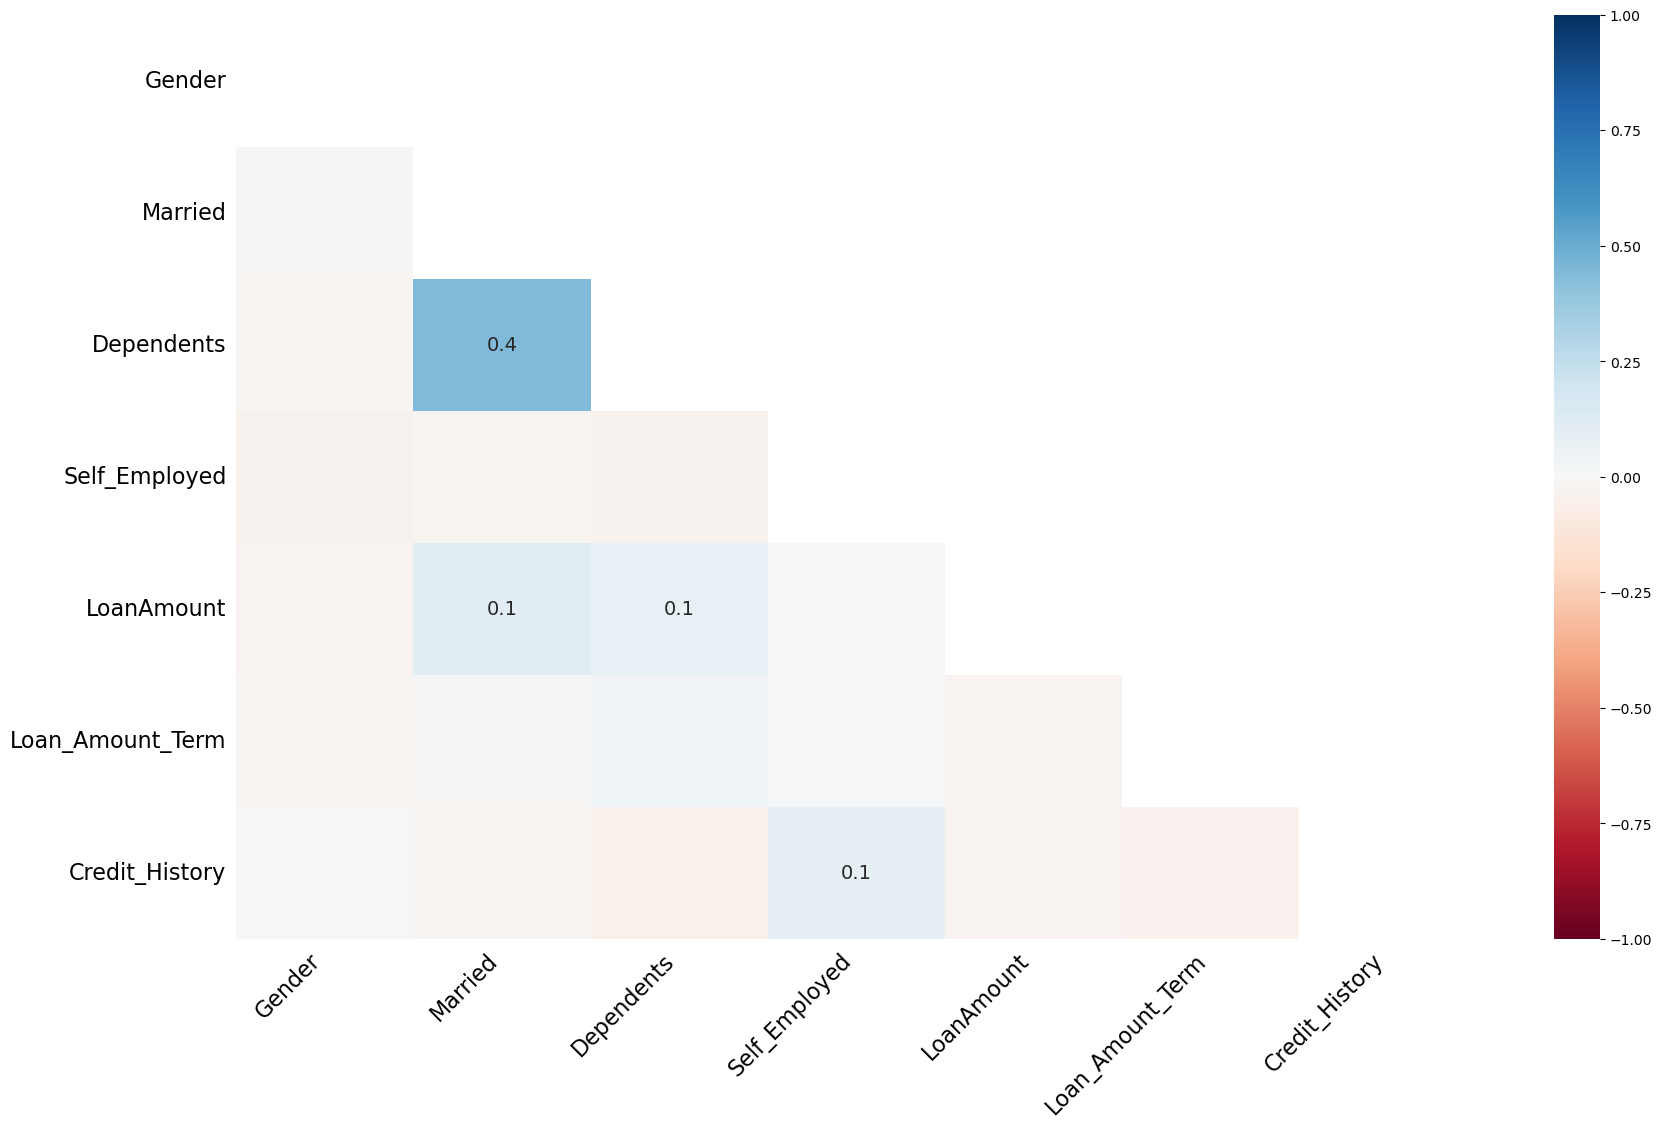

In [10]:
msno.heatmap(df)

<AxesSubplot:>

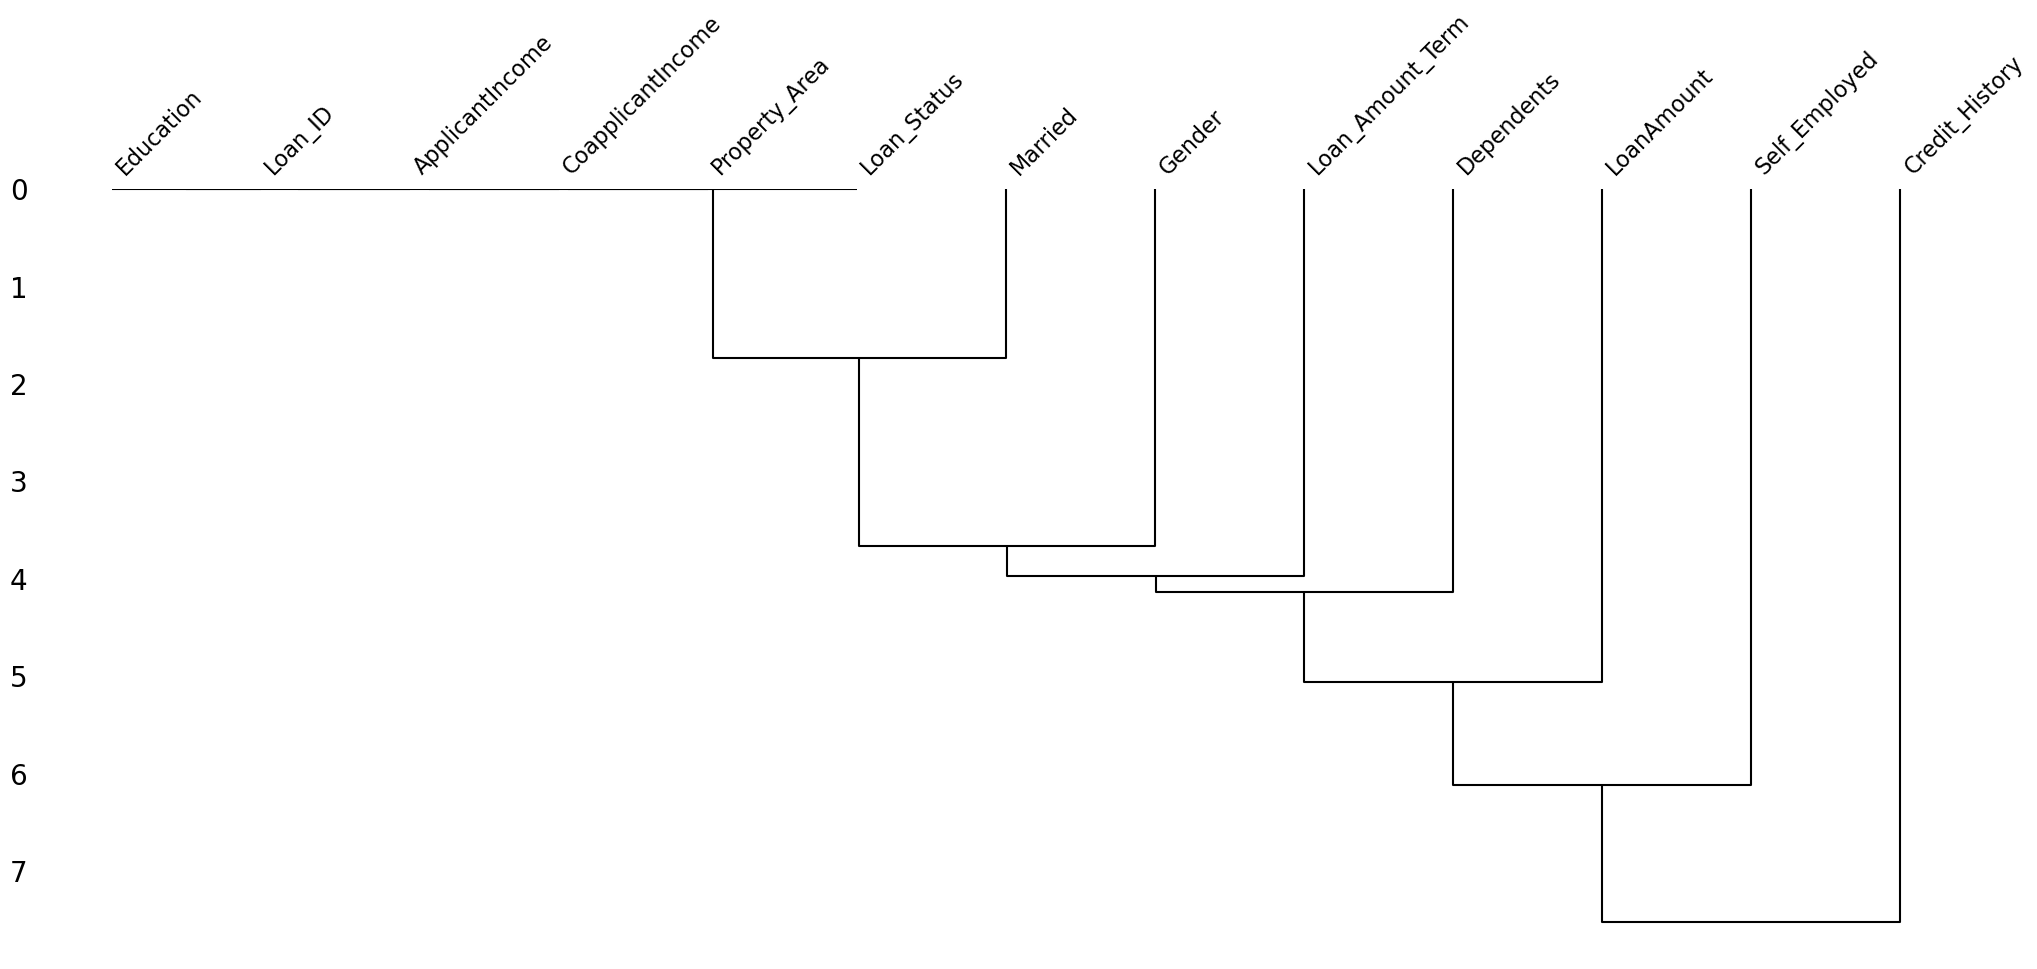

In [11]:
msno.dendrogram(df)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
df.drop(['Loan_ID'],axis=1,inplace=True)

In [14]:
#there is imbalance
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [15]:
# sns.displot(df['age'].dropna(), kde=True, bins=40, color='red')
# plt.title('Distribution of age')

In [16]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<H1>To fill NULL values

In [17]:
#to fill Gender column
lst=[]
for i in range(len(data)):
    if df.Gender[i]!="Female" and df.Gender[i]!="Male":
        lst.append(i)
#         print(data.Married[i])
        if df.Married[i]=='Yes':
            df.Gender[i]='Male'
#             print(data.Gender[i])
        else:
            df.Gender[i]='Female'
#             print(data.Gender[i])
print(lst)

[23, 126, 171, 188, 314, 334, 460, 467, 477, 507, 576, 588, 592]


C:\Users\UFAZ\AppData\Local\Temp\ipykernel_9632\3516722691.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Gender[i]='Male'
C:\Users\UFAZ\AppData\Local\Temp\ipykernel_9632\3516722691.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Gender[i]='Female'


In [18]:
data.iloc[lst]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [19]:
#To fill married column
lst1=[]
for i in range(len(data)):
    if df.Married[i]!="Yes" and df.Married[i]!="No":
        lst1.append(i)
#         print(df.Married[i])
        if df.Gender[i]=='Male':
            df.Married[i]='Yes'
#             print(df.Married[i])
        else:
            df.Married[i]='No'
#             print(df.Married[i])
print(lst1)

[104, 228, 435]


C:\Users\UFAZ\AppData\Local\Temp\ipykernel_9632\2927967349.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Married[i]='Yes'
C:\Users\UFAZ\AppData\Local\Temp\ipykernel_9632\2927967349.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Married[i]='No'


In [20]:
data.iloc[lst1]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [21]:
#object types to dummy
#to fill other columns
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['LoanAmount'].fillna(df['LoanAmount'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


columns_to_dummy=[]
for col in df:
        if (df[f"{col}"]).dtype=='object':
            columns_to_dummy.append(col)
            print(col,df[f"{col}"].unique())
columns_to_dummy.remove('Married')


Gender ['Male' 'Female']
Married ['No' 'Yes']
Dependents ['0' '1' '2' '3+']
Education ['Graduate' 'Not Graduate']
Self_Employed ['No' 'Yes']
Property_Area ['Urban' 'Rural' 'Semiurban']
Loan_Status ['Y' 'N']


In [22]:
# df['Married'].unique()
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

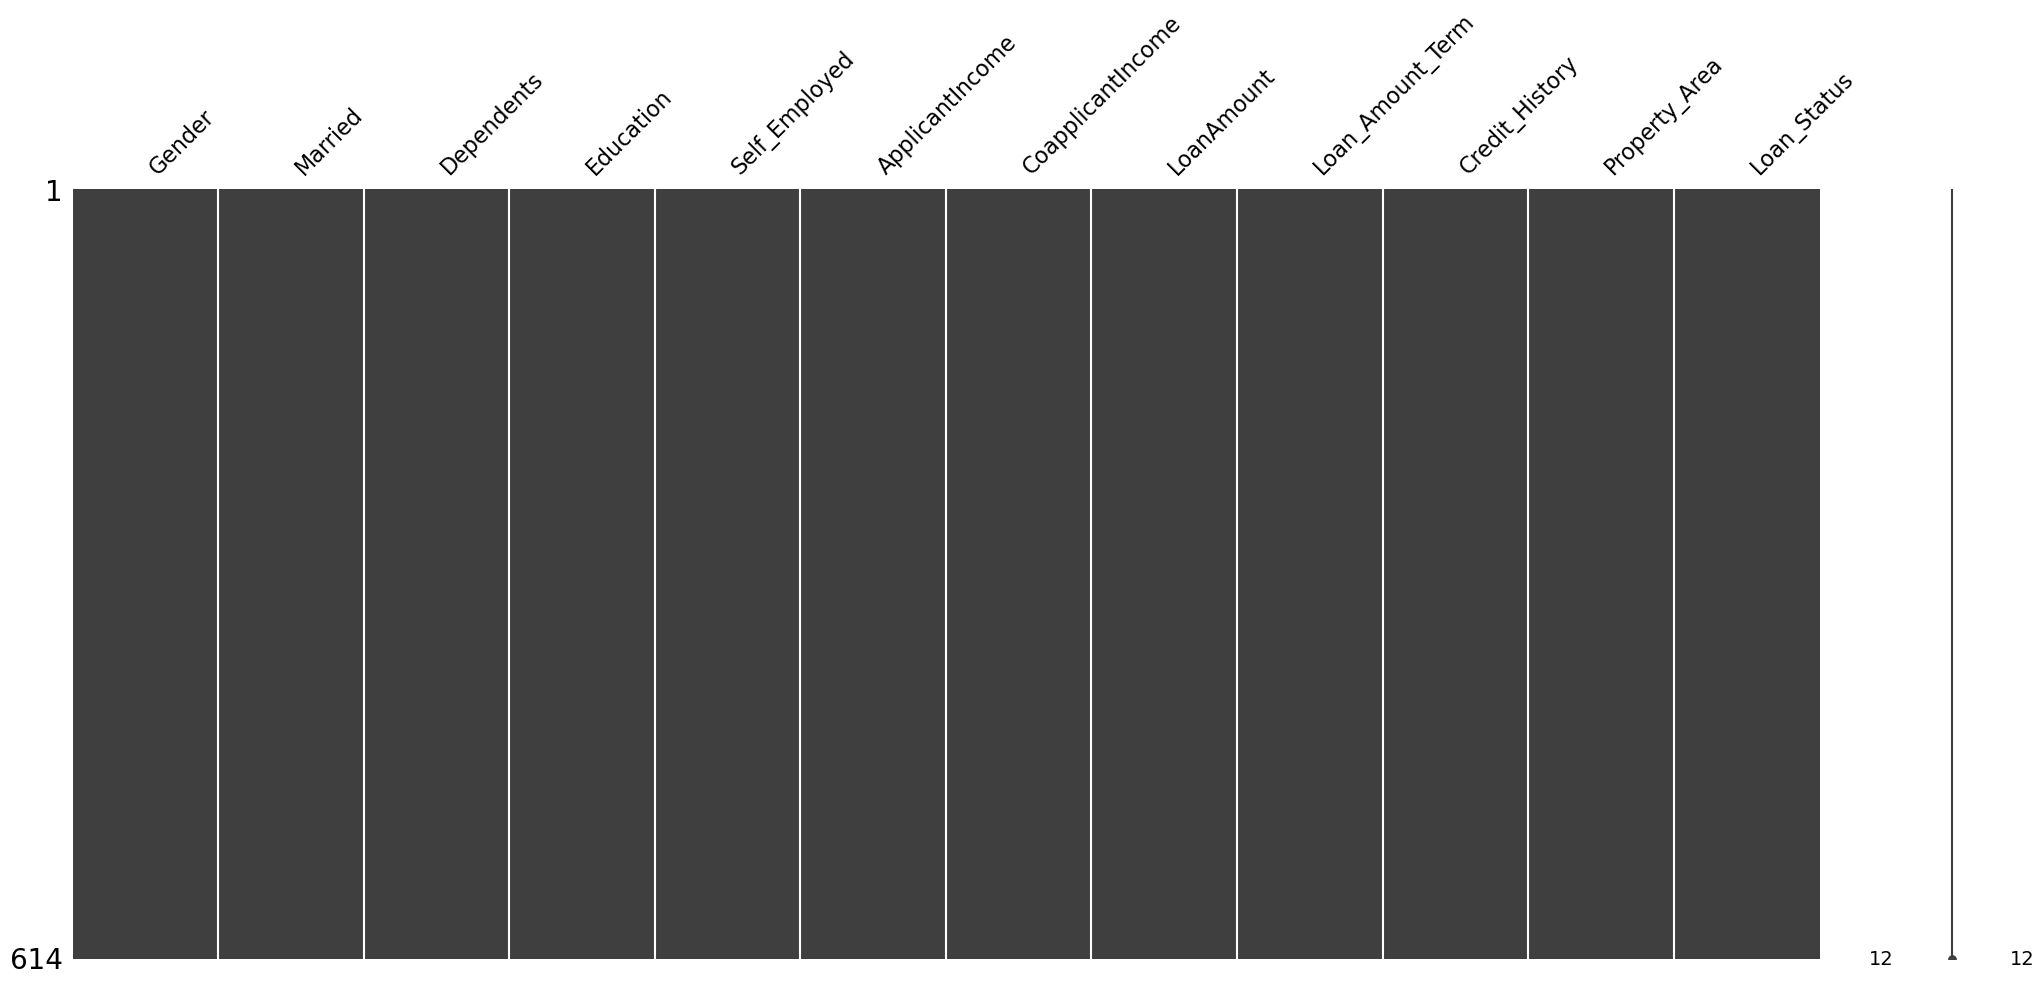

In [23]:
msno.matrix(df)

<H1>Dummy data

In [24]:

for i in columns_to_dummy:
    df = pd.concat([df,pd.get_dummies(df[i],drop_first=True)],axis=1)
df.drop(columns_to_dummy,axis=1,inplace=True)
df['Married']=df['Married'].replace({'No':0, 'Yes':1})



In [25]:
pd.set_option('display.max_columns', None)

df.head()

,Married,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,1,2,3+,Not Graduate,Yes,Semiurban,Urban,Y
0,0,5849,0.0,120.0,360.0,1.0,1,0,0,0,0,0,0,1,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0,0,0
2,1,3000,0.0,66.0,360.0,1.0,1,0,0,0,0,1,0,1,1
3,1,2583,2358.0,120.0,360.0,1.0,1,0,0,0,1,0,0,1,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,1,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            614 non-null    int64  
 1   ApplicantIncome    614 non-null    int64  
 2   CoapplicantIncome  614 non-null    float64
 3   LoanAmount         614 non-null    float64
 4   Loan_Amount_Term   614 non-null    float64
 5   Credit_History     614 non-null    float64
 6   Male               614 non-null    uint8  
 7   1                  614 non-null    uint8  
 8   2                  614 non-null    uint8  
 9   3+                 614 non-null    uint8  
 10  Not Graduate       614 non-null    uint8  
 11  Yes                614 non-null    uint8  
 12  Semiurban          614 non-null    uint8  
 13  Urban              614 non-null    uint8  
 14  Y                  614 non-null    uint8  
dtypes: float64(4), int64(2), uint8(9)
memory usage: 34.3 KB


In [27]:
df.columns
    

Index(['Married', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Male', '1', '2', '3+',
       'Not Graduate', 'Yes', 'Semiurban', 'Urban', 'Y'],
      dtype='object')

In [28]:
# df=df.rename(columns={'Male':'Gender(Male)','Not Graduate':'Education(N.G)','Y':'Loan_Status(Y)'})
df=df.rename(columns={'Male':'Gender(Male)','Married':'Married(Yes)','Not Graduate':'Education(N.G)','Yes':'Self_Employed(Yes)','Y':'Loan_Status(Y)'})

In [29]:
df.head()

,Married(Yes),ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender(Male),1,2,3+,Education(N.G),Self_Employed(Yes),Semiurban,Urban,Loan_Status(Y)
0,0,5849,0.0,120.0,360.0,1.0,1,0,0,0,0,0,0,1,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0,0,0
2,1,3000,0.0,66.0,360.0,1.0,1,0,0,0,0,1,0,1,1
3,1,2583,2358.0,120.0,360.0,1.0,1,0,0,0,1,0,0,1,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,1,1


In [30]:
df

,Married(Yes),ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender(Male),1,2,3+,Education(N.G),Self_Employed(Yes),Semiurban,Urban,Loan_Status(Y)
0,0,5849,0.0,120.0,360.0,1.0,1,0,0,0,0,0,0,1,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0,0,0
2,1,3000,0.0,66.0,360.0,1.0,1,0,0,0,0,1,0,1,1
3,1,2583,2358.0,120.0,360.0,1.0,1,0,0,0,1,0,0,1,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,0,0,1
610,1,4106,0.0,40.0,180.0,1.0,1,0,0,1,0,0,0,0,1
611,1,8072,240.0,253.0,360.0,1.0,1,1,0,0,0,0,0,1,1
612,1,7583,0.0,187.0,360.0,1.0,1,0,1,0,0,0,0,1,1


In [31]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


<AxesSubplot:>

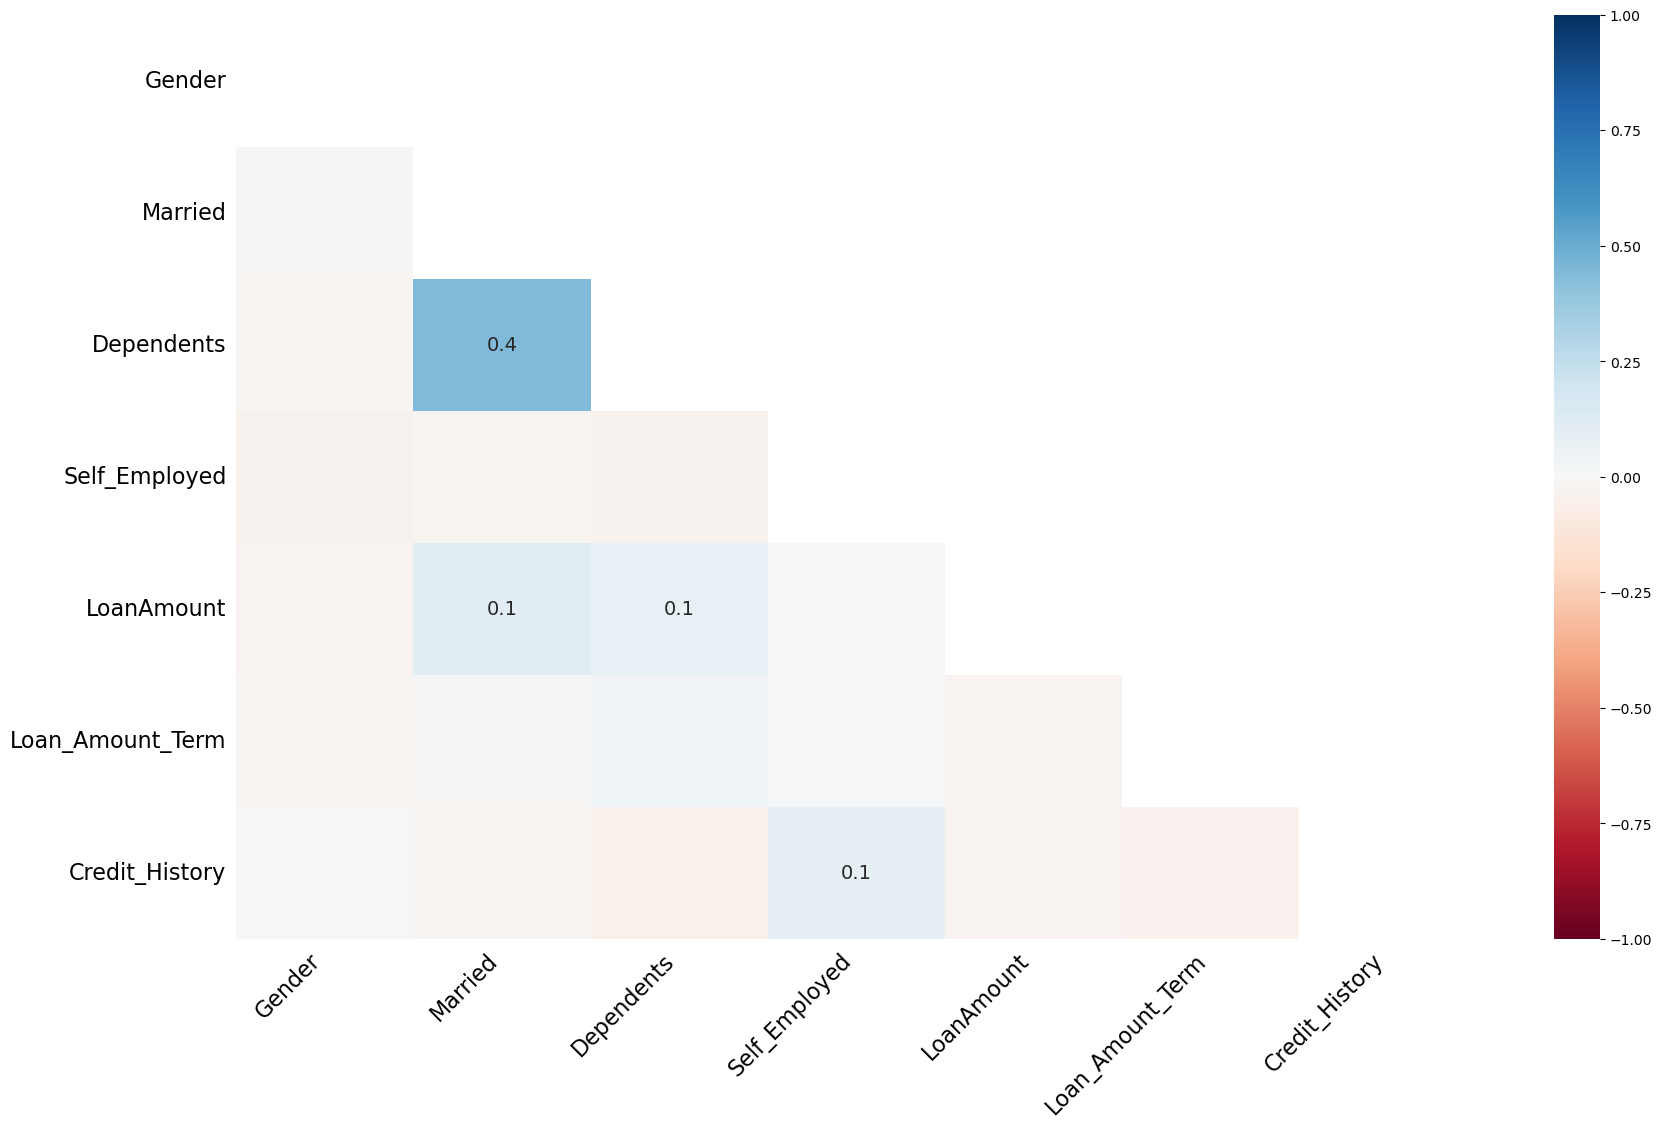

In [32]:
msno.heatmap(data)

In [33]:
df.corr()

,Married(Yes),ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender(Male),1,2,3+,Education(N.G),Self_Employed(Yes),Semiurban,Urban,Loan_Status(Y)
Married(Yes),1.000000,0.049052,0.077760,0.147087,-0.095364,0.009519,0.384752,0.115254,0.250791,0.133450,0.014097,0.005826,0.001468,0.002938,0.089072
ApplicantIncome,0.049052,1.000000,-0.116605,0.564698,-0.046531,-0.018615,0.057199,0.040861,-0.034650,0.156687,-0.140760,0.127180,-0.014246,-0.000598,-0.004710
CoapplicantIncome,0.077760,-0.116605,1.000000,0.189723,-0.059383,0.011134,0.089013,-0.029769,0.010016,0.041491,-0.062290,-0.016100,-0.027044,0.022776,-0.059187
LoanAmount,0.147087,0.564698,0.189723,1.000000,0.037152,-0.000250,0.103059,0.061778,0.020367,0.152619,-0.169436,0.114971,-0.004730,-0.037259,-0.031808
Loan_Amount_Term,-0.095364,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.076699,-0.088492,-0.010609,-0.077273,-0.073928,-0.033739,0.059141,-0.094279,-0.022549
Credit_History,0.009519,-0.018615,0.011134,-0.000250,-0.004705,1.000000,0.003920,0.009757,0.007987,-0.060473,-0.073658,-0.001550,0.035976,-0.016934,0.540556
Gender(Male),0.384752,0.057199,0.089013,0.103059,-0.076699,0.003920,1.000000,0.001169,0.134188,0.083982,0.051520,-0.007875,-0.114930,0.034063,0.018361
1,0.115254,0.040861,-0.029769,0.061778,-0.088492,0.009757,0.001169,1.000000,-0.198046,-0.134337,-0.013355,0.082044,0.011661,0.069320,-0.038740
2,0.250791,-0.034650,0.010016,0.020367,-0.010609,0.007987,0.134188,-0.198046,1.000000,-0.133547,0.020822,0.032434,-0.012017,0.016569,0.062384
3+,0.133450,0.156687,0.041491,0.152619,-0.077273,-0.060473,0.083982,-0.134337,-0.133547,1.000000,0.055288,0.003278,0.007863,-0.047460,-0.026123


In [34]:
data[data['Gender']=='Male']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [35]:
data[data['Gender']=='Female']

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
29,LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
37,LP001112,Female,Yes,0,Graduate,No,3667,1459.0,144.0,360.0,1.0,Semiurban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
48,LP001146,Female,Yes,0,Graduate,No,2645,3440.0,120.0,360.0,0.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,LP002917,Female,No,0,Not Graduate,No,2165,0.0,70.0,360.0,1.0,Semiurban,Y
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
604,LP002959,Female,Yes,1,Graduate,No,12000,0.0,496.0,360.0,1.0,Semiurban,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y


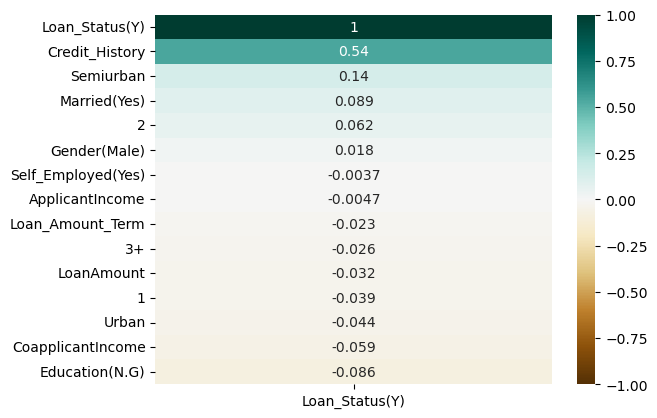

In [36]:
# plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Loan_Status(Y)']].sort_values(by='Loan_Status(Y)', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
# heatmap.set_title('Features Correlating with Income', fontdict={'fontsize':18}, pad=16)

In [37]:
df.head()

,Married(Yes),ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender(Male),1,2,3+,Education(N.G),Self_Employed(Yes),Semiurban,Urban,Loan_Status(Y)
0,0,5849,0.0,120.0,360.0,1.0,1,0,0,0,0,0,0,1,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0,0,0
2,1,3000,0.0,66.0,360.0,1.0,1,0,0,0,0,1,0,1,1
3,1,2583,2358.0,120.0,360.0,1.0,1,0,0,0,1,0,0,1,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,1,1


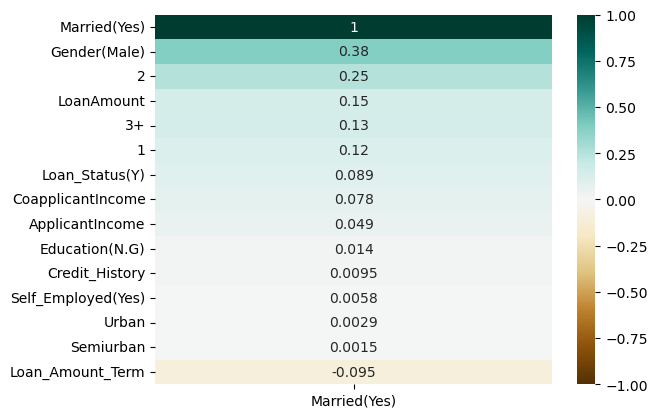

In [38]:
# plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Married(Yes)']].sort_values(by='Married(Yes)', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
# heatmap.set_title('Features Correlating with Income', fontdict={'fontsize':18}, pad=16)

In [39]:
df

,Married(Yes),ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender(Male),1,2,3+,Education(N.G),Self_Employed(Yes),Semiurban,Urban,Loan_Status(Y)
0,0,5849,0.0,120.0,360.0,1.0,1,0,0,0,0,0,0,1,1
1,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0,0,0,0
2,1,3000,0.0,66.0,360.0,1.0,1,0,0,0,0,1,0,1,1
3,1,2583,2358.0,120.0,360.0,1.0,1,0,0,0,1,0,0,1,1
4,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0,0,0,1
610,1,4106,0.0,40.0,180.0,1.0,1,0,0,1,0,0,0,0,1
611,1,8072,240.0,253.0,360.0,1.0,1,1,0,0,0,0,0,1,1
612,1,7583,0.0,187.0,360.0,1.0,1,0,1,0,0,0,0,1,1


In [40]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


NameError: name 'X' is not defined

In [45]:
y=df['Loan_Status(Y)']
X=df.drop('Loan_Status(Y)',axis=1)

In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Married(Yes)        614 non-null    int64  
 1   ApplicantIncome     614 non-null    int64  
 2   CoapplicantIncome   614 non-null    float64
 3   LoanAmount          614 non-null    float64
 4   Loan_Amount_Term    614 non-null    float64
 5   Credit_History      614 non-null    float64
 6   Gender(Male)        614 non-null    uint8  
 7   1                   614 non-null    uint8  
 8   2                   614 non-null    uint8  
 9   3+                  614 non-null    uint8  
 10  Education(N.G)      614 non-null    uint8  
 11  Self_Employed(Yes)  614 non-null    uint8  
 12  Semiurban           614 non-null    uint8  
 13  Urban               614 non-null    uint8  
dtypes: float64(4), int64(2), uint8(8)
memory usage: 33.7 KB


In [ ]:
#scale the number to the same level
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_cols = X.columns
X_index = X.index
X = scaler.fit_transform(X)
X = pd.DataFrame(data=X,columns=X_cols,index=X_index)
X


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=71,stratify=y)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

<H1>Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
model = BaggingClassifier(DecisionTreeClassifier(random_state=71))
model.fit(X_train, y_train)

In [ ]:
model.score(X_train, y_train)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score,precision_score
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n',cm)
print(
    '\nAccuracy score:',accuracy_score(y_test,y_pred),
    '\nPrecision score:',precision_score(y_test,y_pred),
    '\nRecall score:',recall_score(y_test,y_pred),
    '\nF1 score:',f1_score(y_test,y_pred),
)

<H2>LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
log_bag_model = BaggingClassifier(LogisticRegression())

In [ ]:
log_bag_model.fit(X_train, y_train)
log_bag_model.score(X_train, y_train)



In [ ]:
y_pred=log_bag_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score,precision_score
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n',cm)
print(
    '\nAccuracy score:',accuracy_score(y_test,y_pred),
    '\nPrecision score:',precision_score(y_test,y_pred),
    '\nRecall score:',recall_score(y_test,y_pred),
    '\nF1 score:',f1_score(y_test,y_pred),
)

<H1>Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model = GradientBoostingClassifier(learning_rate=0.01,random_state=1)
gbc_model.fit(X_train, y_train)
gbc_model.score(X_train, y_train)

In [ ]:
y_pred = gbc_model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n',cm)
print(
    '\nAccuracy score:',accuracy_score(y_test,y_pred),
    '\nPrecision score:',precision_score(y_test,y_pred),
    '\nRecall score:',recall_score(y_test,y_pred),
    '\nF1 score:',f1_score(y_test,y_pred),
)

<H1>LightGBM

In [ ]:
from lightgbm import LGBMClassifier
lgb_model=LGBMClassifier()
lgb_model.fit(X_train, y_train)
lgb_model.score(X_train, y_train)


In [ ]:
y_pred = lgb_model.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n',cm)
print(
    '\nAccuracy score:',accuracy_score(y_test,y_pred),
    '\nPrecision score:',precision_score(y_test,y_pred),
    '\nRecall score:',recall_score(y_test,y_pred),
    '\nF1 score:',f1_score(y_test,y_pred),
)

<H1>XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb_model=XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
xgb_model.score(X_train, y_train)


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n',cm)
print(
    '\nAccuracy score:',accuracy_score(y_test,y_pred),
    '\nPrecision score:',precision_score(y_test,y_pred),
    '\nRecall score:',recall_score(y_test,y_pred),
    '\nF1 score:',f1_score(y_test,y_pred),
)

<H1>CatBoost

In [ ]:
from catboost import CatBoostClassifier
cb_model=CatBoostClassifier()
cb_model.fit(X_train, y_train)
cb_model.score(X_train, y_train)

In [ ]:
# pip   install catboost

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n',cm)
print(
    '\nAccuracy score:',accuracy_score(y_test,y_pred),
    '\nPrecision score:',precision_score(y_test,y_pred),
    '\nRecall score:',recall_score(y_test,y_pred),
    '\nF1 score:',f1_score(y_test,y_pred),
)

<H1>Voting

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, stratify = y)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()
model3 = SVC()

In [ ]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

In [ ]:
model1_pred = model1.predict(X_test)
model2_pred = model2.predict(X_test)
model3_pred = model3.predict(X_test)


In [ ]:
print(model1.__class__.__name__ , accuracy_score(y_test, model1_pred))
print(model2.__class__.__name__ , accuracy_score(y_test, model2_pred))
print(model3.__class__.__name__ , accuracy_score(y_test, model3_pred))

<H3>Hard

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
estimators = [('lr', model1), ('dt', model2) , ('svm', model3)] 
voting_hard = VotingClassifier(estimators, voting="hard")
voting_hard.fit(X_train, y_train)

In [ ]:
voting_hard_pred = voting_hard.predict(X_test)

In [ ]:
accuracy_score(y_test, voting_hard_pred)

<H3>Soft

In [ ]:
estimators = [('lr', model1), ('dt', model2) , ('svm', model3) ] 
voting_soft = VotingClassifier(estimators, voting="soft")

In [ ]:
voting_soft.fit(X_train, y_train)

In [ ]:
model4 = SVC(probability=True) 
estimators = [('lr', model1), ('dt', model2) , ('svm', model4) ] 
voting_soft = VotingClassifier(estimators, voting="soft")

In [ ]:
voting_soft.fit(X_train, y_train)

In [ ]:
voting_soft_pred = voting_soft.predict(X_test)

In [ ]:
accuracy_score(y_test, voting_soft_pred)